# Manifolds for Categorical Distribution


### What is a Categorical Distribution?
A Categorical distribution describes the results of a random variable that can take on one of $K$ categories where $K \in \mathbb{Z}_+$. 

Examples:
- Coin Flipping ($K=2$) - Two possible results: head and tail.
- Die Rolling ($K=6$) - Six possible results: 1, 2, 3, 4, 5, and 6.
<p float="left">
  <img src="images/coins.png" height="150" />
  <img src="images/dice.jpeg" height="150" /> 
</p>


### Probability 101
Fundamental Axioms of Probability
- A probability is always a real number that falls in the open interval $[0,1]$
- $P(\Omega) = 1$ where $\Omega$ is the whole sample space containing all possible outcomes

Examples:
- Given the probability of head in a coin flip $P(H)$ would mean that the probability of tail is $P(T)=1-P(H)$. Only one value is needed to describe a two-outcome random variable.

### The Manifold
- Observation: Only $K-1$ probabilities are needed to characterize a $K$-category distribution. The last probability can be inferred by one minus the sum of the other $K-1$ probabilities.

- Result: A $K-1$ dimensional manifold for a $K$-category distribution.
- Constraint: Each of the $K-1$ probabilities as well as their sum must lie in the open interval $[0,1]$.
- Result: The manifold natually forms a **level set** that has the geometry known as the standard (k-1)-dimensional solid regular simplex for a k-category distribution.
- Definition for regular k-simplex:
 $\{x\in\mathbb{R}^k:x_0+...+x_{k-1}=1,x_i\geq 0 \: \forall i = 0,...,k-1\}$


### Shape of N-Dimensional Simplex
- A 0-D simplex is a point (Only one category with 100% Accuracy)
- A 1-D simplex is a line from 0 to 1 (Corresponding to the probability of one of the two events)
- A 2-D simplex is a triangle
- A 3-D simplex is a tetrahedron
- N-D simplex ...
<center><img src="images/simplex.jpg" width=650px alt=\"default\"/></center>

### Visualization of the 2D and 3D Manifold

INFO: Using numpy backend


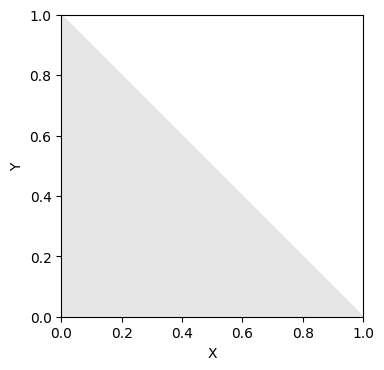

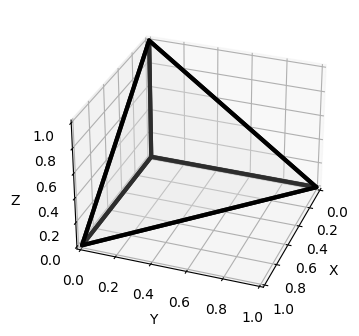

In [1]:
# Plot the Manifold with dimension 2 and 3
import CategoricalDistributionsManifold
import numpy as np
import importlib
importlib.reload(CategoricalDistributionsManifold)
M2 = CategoricalDistributionsManifold.CategoricalDistributionsManifold(dim = 2)
M3 = CategoricalDistributionsManifold.CategoricalDistributionsManifold(dim = 3)

M2.plot()
M3.plot()

### Visualization of Random Samples over the Manifold

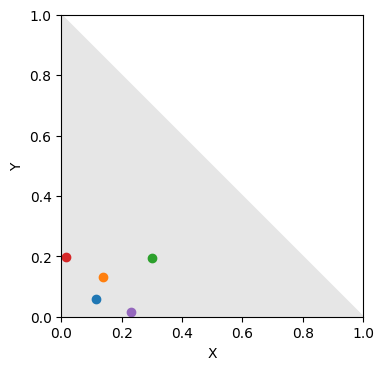

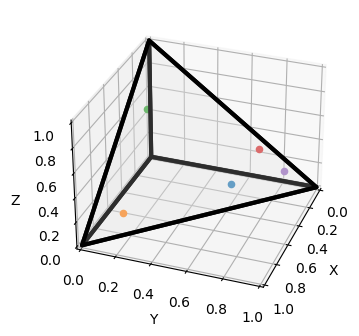

In [2]:
# Plot the 2D and 3D manifold with random points
M2.scatter(n_samples=5)
M3.scatter(n_samples=5)



### Visualization of Geodesics with Initial and End Points Specified

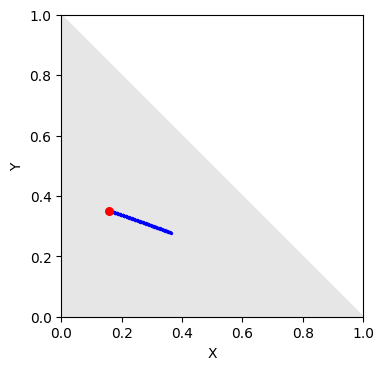

In [3]:
# Plot the manifold with geodesic with initial and end point
from geomstats.information_geometry.categorical import CategoricalDistributions, CategoricalMetric
dist2 = CategoricalDistributions(dim = 2)
dist3 = CategoricalDistributions(dim = 3)
points = dist2.random_point(n_samples = 2)
# Special Cases
# points = np.array([[0,0,1], [0,1,0]])
# points = np.array([[0,0,1], [1,0,0]])
# points = np.array([[0.25,0.75,0], [0.75,0.25,0]])
M2.plot_geodesic(initial_point = points[0], end_point = points[1])


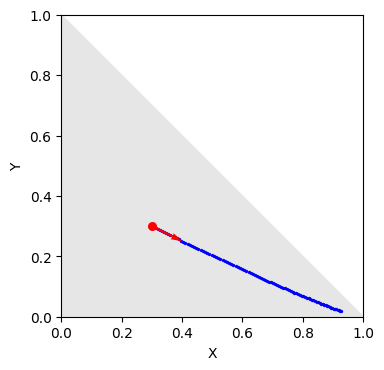

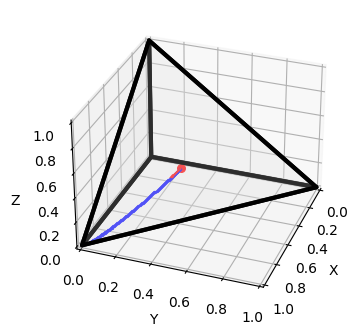

In [4]:
vector2 = np.array([1,0,0])
base_point2 = np.array([0.3, 0.3, 0.4])
tangent_vector2 = dist2.to_tangent(vector = vector2, base_point= base_point2)
M2.plot_geodesic(initial_point = base_point2, tangent_vector = tangent_vector2)

vector3 = np.array([1,0,0,0])
base_point3 = np.array([0.3, 0.3, 0.2, 0.2])
tangent_vector3 = dist3.to_tangent(vector = vector3, base_point= base_point3)
M3.plot_geodesic(initial_point = base_point3, tangent_vector = tangent_vector3)





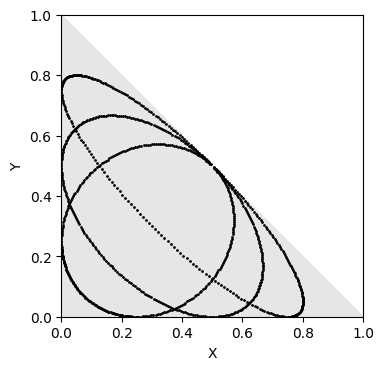

In [5]:
#Geodesic Grid
M2.plot_grid()

### Applications
- Image Classification
- Questionaiire Analysis: Har-Shemesh, O., Quax, R., Lansing, J.S. et al. Questionnaire data analysis using information geometry. Sci Rep 10, 8633 (2020). https://doi.org/10.1038/s41598-020-63760-8